In [113]:
import glob
import jsonlines
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
annotations_dir = "/Users/dxy/Desktop/warp/imerit_26102023_clips/annotations"

In [18]:
annotation_files = glob.glob(f"{annotations_dir}/annotations/consolidated-annotation/output/*/*.json")
annotation_files.sort()


In [39]:
def key_to_video_str():
    return


In [136]:
num_annotated_frames = 0
all_fish_areas = []
fish_in_each_video = []
fish_in_each_frame = []
num_unique_fish_in_each_video = []
num_frames_each_unique_fish_appears_in = []

for a_f in annotation_files:
    with jsonlines.open(a_f) as reader:
        vid_num = Path(a_f).parent.name

        for check, video_seq in enumerate(reader):
            assert check == 0 # each json just has one long line
                
            num_frames_with_annotations = len(video_seq['tracking-annotations'])
            num_annotated_frames += num_frames_with_annotations
            
            unique_fish_names = []
            unique_fish_ids = []
            unique_fish_counts = {}
            
            num_fish_per_video = 0
            
            for ann_frame_num, per_frame in enumerate(video_seq['tracking-annotations']):
                # keys: (['annotations', 'frame-no', 'frame', 'frame-attributes'])
                annotations = per_frame['annotations']
                num_fish_per_frame = len(annotations)
                num_fish_per_video += num_fish_per_frame
                
                for fish in annotations:
                    #keys: (['height', 'width', 'top', 'left', 'class-id', 'label-category-attributes', 'object-id', 'object-name'])
                    
                    # unique fish
                    obj_id = fish['object-id']
                    obj_name = fish['object-name']
                    if obj_id not in unique_fish_ids:
                        unique_fish_ids.append(obj_id)
                    if obj_name not in unique_fish_names:
                        unique_fish_names.append(obj_name)
                        
                    # how many frames did this unique fish appear in
                    if obj_id in unique_fish_counts:
                        unique_fish_counts[obj_id] += 1
                    else:
                        unique_fish_counts[obj_id] = 0
                        
                    # area
                    area = fish['height'] * fish['width']
                    all_fish_areas.append(area)
                
                fish_in_each_frame.append(num_fish_per_frame)

            for k,v in unique_fish_counts.items():
                num_frames_each_unique_fish_appears_in.append(v)
            
            fish_in_each_video.append(num_fish_per_video)
            num_unique_fish_in_each_video.append(len(unique_fish_names))
            assert len(unique_fish_names) == len(unique_fish_ids)
                
print(f"Number of videos: {len(annotation_files)}")
print(f"Number of annotated frames: {num_annotated_frames} out of {len(annotation_files) * 90}")
print(f"Total number of annotated boxes: {len(all_fish_areas)}")

print(f"Average area of each annotated box: {np.mean(all_fish_areas)} +/- {np.std(all_fish_areas)} pixels^2")
print(f"Biggest fish: {max(all_fish_areas)} pixels^2")

print(f"Number of unique fish: {np.sum(num_unique_fish_in_each_video)}")
print(f"Average number of unique fish per video: {np.mean(num_unique_fish_in_each_video)} +/- {np.std(num_unique_fish_in_each_video)}")
print(f"Average number of frames per unique fish: {np.mean(num_frames_each_unique_fish_appears_in)} +/- {np.std(num_frames_each_unique_fish_appears_in)}")
print(f"Average number of fish per frame: {np.mean(fish_in_each_frame)} +/- {np.std(fish_in_each_frame)}")


Number of videos: 162
Number of annotated frames: 11078 out of 14580
Total number of annotated boxes: 98267
Average area of each annotated box: 1716.4930749895693 +/- 4160.905627274636 pixels^2
Biggest fish: 170940 pixels^2
Number of unique fish: 15802
Average number of unique fish per video: 97.54320987654322 +/- 177.84707325744753
Average number of frames per unique fish: 5.218643209720288 +/- 6.87995124473156
Average number of fish per frame: 8.870463982668351 +/- 15.102003527505385


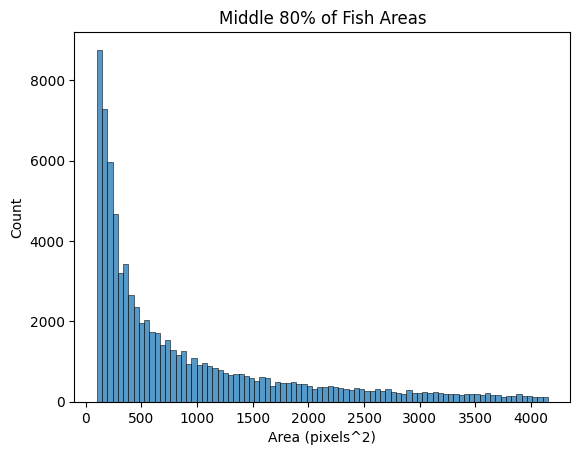

In [121]:
all_fish_areas.sort()
lower = int(len(all_fish_areas) * 0.1)
upper = int(len(all_fish_areas) * 0.9)

plt.figure()
sns.histplot(all_fish_areas[lower:upper])
plt.title("Middle 80% of Fish Areas")
plt.xlabel("Area (pixels^2)")
plt.show()

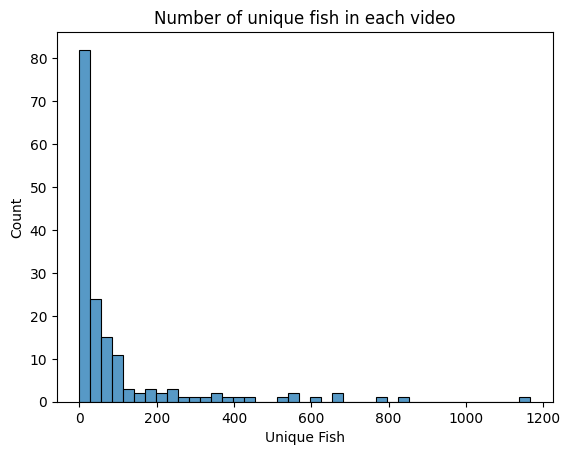

In [111]:

plt.figure()
sns.histplot(num_unique_fish_in_each_video)
plt.title("Number of unique fish in each video")
plt.xlabel("Unique Fish")
plt.show()


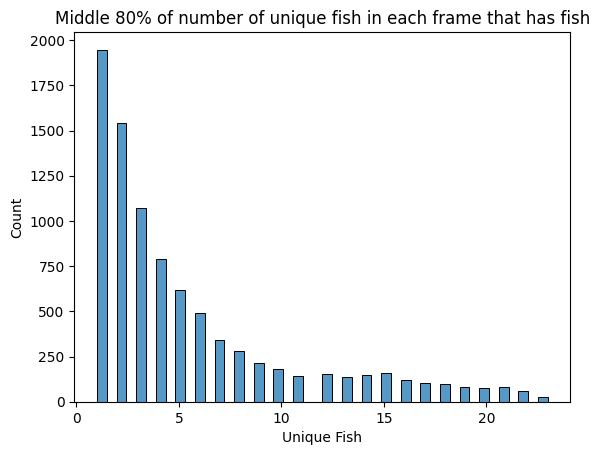

In [132]:
fish_in_each_frame.sort()
lower = int(len(fish_in_each_frame) * 0.1)
upper = int(len(fish_in_each_frame) * 0.9)



plt.figure()
sns.histplot(fish_in_each_frame[lower:upper])
plt.title("Middle 80% of number of unique fish in each frame that has fish")
plt.xlabel("Unique Fish")
plt.show()
